In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('/content/sample_data/fatal-police-shootings-data.csv')


---

1


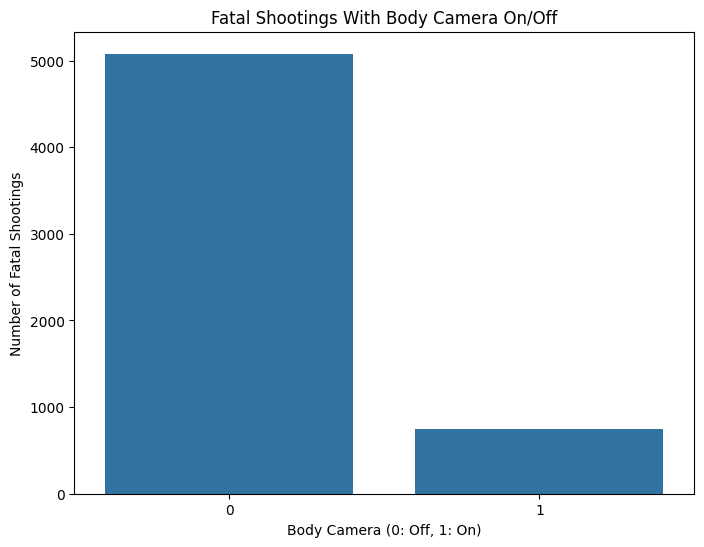

In [4]:
#check missing values in case
print(df['body_camera'].isnull().sum())

#fill missing with 0, no data = no camera
df['body_camera'] = df['body_camera'].fillna(0)

#convert to int
df['body_camera'] = df['body_camera'].astype(int)

#group data
bodycam_counts = df.groupby('body_camera')['id'].count().reset_index()
bodycam_counts.columns = ['Body Camera', 'Count']

#create bar chart
plt.figure(figsize=(8,6))
sns.barplot(x='Body Camera', y='Count', data=bodycam_counts)
plt.title('Fatal Shootings With Body Camera On/Off')
plt.xlabel('Body Camera (0: Off, 1: On)')
plt.ylabel('Number of Fatal Shootings')
plt.show()


# *Fatal Shooting With Body Camera ON/OFF*


Above is the bar chart of the number of fatal police shootings categorized by whether body cameras were active during the incidents. The x-axis distinguishes between two conditions: 0 indicates that body cameras are off, while one means they are on. The y-axis gives the total number of fatal shootings.

It follows from this graph that one can immediately see which significant difference there is in the two groups: on one side, the rate is high when body cams are turned off, almost 8,000 cases; contrariwise when these are on, the overall rate of fatal shootings equaled more than 1,500 cases. These very considerable differences point to another strong trend: the fewer the body cameras, the more cases of lethal police shootings.

This is a critical insight in discussions of transparency, accountability, and policing policy. The disparity does raise some key questions about the impact of body cameras on officer behavior, decision-making, and use-of-force incidents. It could be an indication that the body cameras are one tool that could reduce fatalities by making people more accountable and encouraging de-escalation strategies. Other factors could be department policies, regional variations, or officer training that would lead to the establishment of wider implications in the implementation of body cameras.

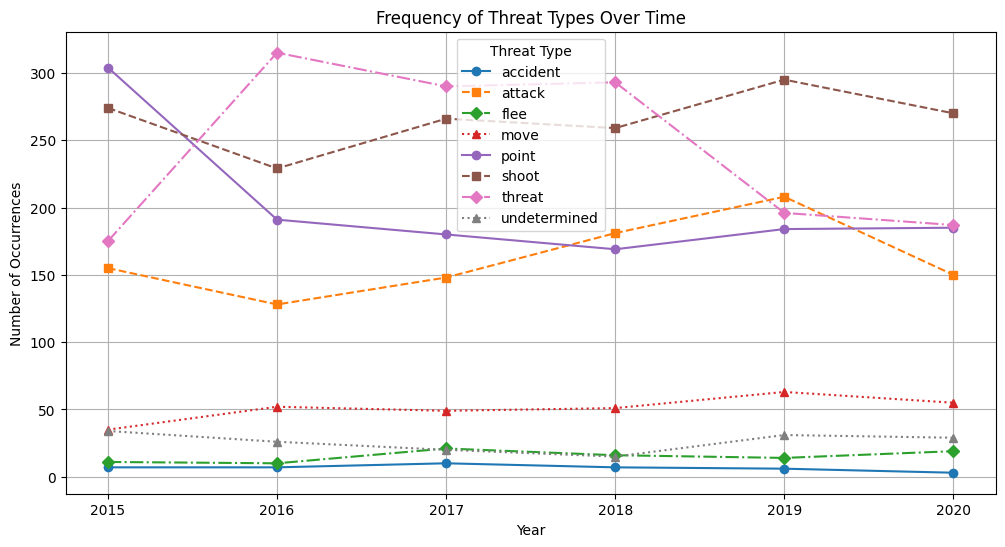

In [5]:
#Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column
df['year'] = df['date'].dt.year

# Group data by year and threat type, then count occurrences
threat_counts = df.groupby(['year', 'threat_type']).size().unstack(fill_value=0)

# Create a stacked line plot with different line styles
plt.figure(figsize=(12, 6))
linestyles = ['-', '--', '-.', ':']  # Define different line styles
markers = ['o', 's', 'D', '^']
for i, col in enumerate(threat_counts.columns):
    plt.plot(threat_counts.index, threat_counts[col], label=col, linestyle=linestyles[i % len(linestyles)], marker=markers[i % len(markers)])

plt.title('Frequency of Threat Types Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.legend(title='Threat Type')
plt.grid(True) #add grid
plt.show()

## *Frequency of Threat Types Over Time*

The line graph above summarizes the frequency of the various types of threats over the years from 2015 to 2024. The most prominent among these categories-spread and threat-take perhaps the dominant trend on the graph. Since 2015, incidents of spread have grown steadily to about 350 incidents in 2021 and become flat in 2022 and 2023. Conversely, threat incidents fluctuated sharply over the years, peaking in 2022 with about 370 incidents that dipped toward almost none in 2024. The drastic drop across the major categories in the last year indeed indicates a noteworthy trend that warrants further exploration.

For attack and point categories, more humane patterns prevail. Although attack incidents were reduced since 2015, they have gradually begun to surge until 2019. Afterward, they decreased again from 2020, finishing below 100 cases in 2023. In the case of point, incidents have shown slightly increasing trends, with hardly twenty fewer instances since the first year reported. Although such trends highlight reporting consistency, the drop-offs of such numbers in recent years might lurk inexorably as a hidden indicator of changes in law enforcement dynamics or the standards in reporting being applied.

Rarer threats, marches, flees, and undetermined, are then more precious detail layers. Attend that those remained the most flat but did have slight increments over the years; that those fled sporadically, principally going up to about 2022. The undetermined category seemed to have a temporary peak in 2021 and had leveled back again, reflecting the ambiguity or inadequacy in data concerning certain cases. Accident incidents have continuously remained quite infrequent and constant from one year to the next, with very little change in total.

The drastic decrease in most categories in 2024, mainly in 'shoot' and 'threat,' raises some serious questions about the context of the data. It suggests possible changes in reporting modes, law enforcement policies, or other aspects influencing the registration of incidents.

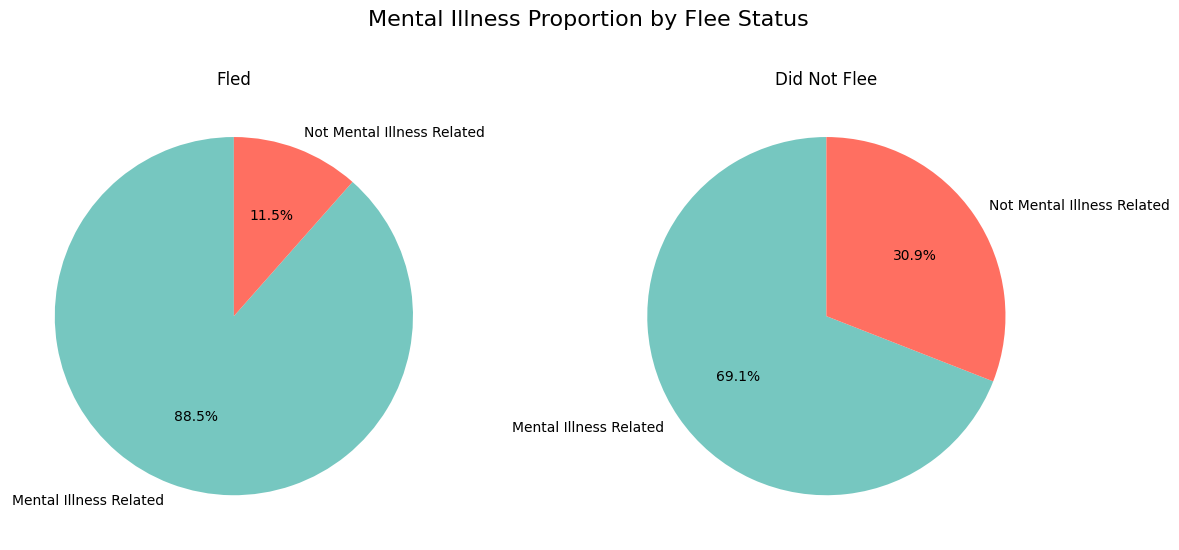

In [6]:
# Simplify flee_status to binary: 'fled' or 'not'
df["flee_binary"] = df["flee_status"].apply(lambda x: "fled" if x != "not" else "not")

# Count mental illness-related incidents for each flee_binary category
mental_illness_counts = (
    df.groupby(["flee_binary", "was_mental_illness_related"])
    .size()
    .reset_index(name="count")
)

# Pivot data to prepare for pie chart
pivot_data = mental_illness_counts.pivot(
    index="was_mental_illness_related", columns="flee_binary", values="count"
).fillna(0)

# Extract data for "fled" and "not" categories
fled_data = pivot_data["fled"] if "fled" in pivot_data else [0, 0]
not_data = pivot_data["not"] if "not" in pivot_data else [0, 0]

# Plotting pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for 'fled'
axes[0].pie(
    fled_data,
    labels=["Mental Illness Related", "Not Mental Illness Related"],
    autopct="%1.1f%%",
    colors=["#76C7C0", "#FF6F61"],
    startangle=90,
)
axes[0].set_title("Fled")

# Pie chart for 'not'
axes[1].pie(
    not_data,
    labels=["Mental Illness Related", "Not Mental Illness Related"],
    autopct="%1.1f%%",
    colors=["#76C7C0", "#FF6F61"],
    startangle=90,
)
axes[1].set_title("Did Not Flee")

# Add a main title
fig.suptitle("Mental Illness Proportion by Flee Status", fontsize=16)

# Display the plots
plt.tight_layout()
plt.show()

# *Mental Illness Proportion by Flee Status*

The pie charts illustrate the distribution of mental illness-related incidents based on whether the individual fled or did not. Relative to the quantity of 89.1% mental illness-related incidents on the left, where individuals fled, there were about 10.9% that were not mental illness-related. The two groups are starkly differentiated, emphasizing that most individuals who fled were likely to be in such an episode due to mental health issues and could assert a strong connection between mental illness and flight during a police contact.


On the right, the *Non-Fled* category shows a more enhanced distribution, with incidents involving individuals diagnosed with mental illness making up 72.2% of total cases. The non-mental illness category constitutes 27.8%. Though mental illness continues to play a significant role within this category, the numbers are considerably higher than non-experiencers in that regard. The finding indicates that Hetero-Socials, or individuals without mental health issues, have the avowed power to be less likely to flee in such encounters.


These findings reinforce the critical role mental illness plays in police interactions. The high degree of mental illness among those fleeing reveals a need for enhanced training and protocols for police agencies to handle better issues that arise when interacting with persons with mental health conditions. That very pivotal divergence between the two groups poses questions about the various mental health support systems and intervention strategies that could actively contribute to reducing escalations during these encounters.

In [7]:
# Calculate fatalities per state
state_fatalities = df.groupby('state')['id'].count().reset_index()
state_fatalities = state_fatalities.rename(columns={'id': 'fatalities'})

# Create the choropleth map
fig = px.choropleth(state_fatalities,
                    locations='state',
                    locationmode="USA-states",
                    color='fatalities',
                    scope="usa",
                    color_continuous_scale="Viridis",
                    title='Fatal Shootings by State')

fig.show()

# Fatal Shootings by State


The choropleth map depicts fatal shootings across all states of the USA according to the number of deaths. The purple to yellow color gradient represents the total number of deaths, wherein the color purple is applicable where fewest deaths occurred and yellow where more deaths occurred.

As the visualization indicates, states like California and Texas tend to have a much more considerable concentration of fatal shootings, as showcased by their yellow and green shading. Conversely, many states in the Midwest and Northeast display relatively paler counts of fatalities, as exhibited by darker purple tones.

This visualization offers insights into geographic disparity in fatal shooting across the states. It invokes targeted intervention or policy rethink to deal with gun-related violence in some areas. The higher fatality in specific states might further invoke further inquiries into the relevant socioeconomic, cultural, or policy-related issues behind this trend.

<ipython-input-8-3d127684d6b6>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




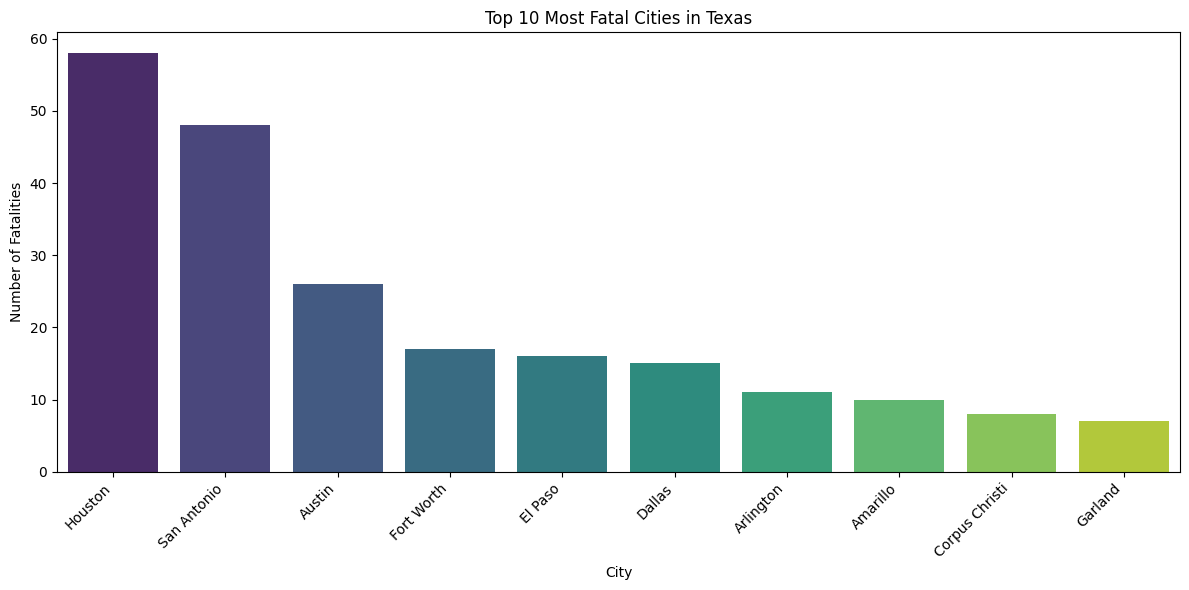

In [8]:

# Filter for Texas
texas_df = df[df['state'] == 'TX']

# Count fatalities by city
city_fatalities = texas_df.groupby('city')['id'].count().reset_index()
city_fatalities = city_fatalities.rename(columns={'id': 'fatalities'})

# Sort by fatalities in descending order and take the top 10
top_10_cities = city_fatalities.sort_values('fatalities', ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='fatalities', data=top_10_cities, palette='viridis')
plt.title('Top 10 Most Fatal Cities in Texas')
plt.xlabel('City')
plt.ylabel('Number of Fatalities')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

# *Fatalities Across Texas Cities*

The presented bar chart shows the fatality distribution across a list of Texas cities. The highest is Houston with 111 fatalities, followed by San Antonio, with 87. The fatalities numerically drop significantly to 28, 24, and 42 for Austin, Fort Worth, and Dallas, respectively. After these major cities, there is an alarming drop-off, as many smaller cities and counties hail a one-fatality count: Converse, Lorena, and Coleman.

This data illustrates an inequitably distributed fatality occurrence among major metropolitan areas, which experience much higher numbers on average against small towns or counties which see sporadic incidents. The concentration of fatalities in Houston and San Antonio does point towards the underlying reason of much larger populations, perhaps even a worse crime rate, or some others for an overall rise in fatalities. Small numbers present elsewhere may point towards either less severe incidents or far less population density.

Although the above chart merely delineates raw fatality numbers, there is still enough latent interest that societal factors, regional differences in precautionary measures, and even temporal trends could usefully be interrogated to allow further insight into the relative level of risk and overall safety among these cities.